In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tabulate import tabulate  # For pretty printing tables
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
missing_values = df.isnull().sum()
print("\nMissing Values:\n", tabulate(missing_values.reset_index(), headers=["Sr_no","Feature", "Missing Values"], tablefmt="pretty"))


Missing Values:
 +-------+--------------------------+----------------+
| Sr_no |         Feature          | Missing Values |
+-------+--------------------------+----------------+
|   0   |       Pregnancies        |       0        |
|   1   |         Glucose          |       5        |
|   2   |      BloodPressure       |       35       |
|   3   |      SkinThickness       |      227       |
|   4   |         Insulin          |      374       |
|   5   |           BMI            |       11       |
|   6   | DiabetesPedigreeFunction |       0        |
|   7   |           Age            |       0        |
|   8   |         Outcome          |       0        |
+-------+--------------------------+----------------+


In [4]:

# 2. Fill missing values with the median
df.fillna(df.median(), inplace=True)

# 3. Generate summary statistics for the dataset
summary_stats = df.describe()
# Display summary statistics in a pretty table format
print("\nSummary Statistics:\n", tabulate(summary_stats.transpose(), headers=["column Names","count","mean","std","min","25%","50%","75%","max"], tablefmt="pretty"))



Summary Statistics:
 +--------------------------+-------+---------------------+---------------------+-------+---------+--------+---------+-------+
|       column Names       | count |        mean         |         std         |  min  |   25%   |  50%   |   75%   |  max  |
+--------------------------+-------+---------------------+---------------------+-------+---------+--------+---------+-------+
|       Pregnancies        | 768.0 | 3.8450520833333335  | 3.3695780626988694  |  0.0  |   1.0   |  3.0   |   6.0   | 17.0  |
|         Glucose          | 768.0 |      121.65625      |  30.43828582241517  | 44.0  |  99.75  | 117.0  | 140.25  | 199.0 |
|      BloodPressure       | 768.0 |     72.38671875     | 12.096641733978139  | 24.0  |  64.0   |  72.0  |  80.0   | 122.0 |
|      SkinThickness       | 768.0 | 29.108072916666668  |  8.791221023089706  |  7.0  |  25.0   |  29.0  |  32.0   | 99.0  |
|         Insulin          | 768.0 |     140.671875      |   86.383059693181   | 14.0  |  121.5 

In [5]:
# 4. Correlation matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:\n", tabulate(corr_matrix, headers='keys', tablefmt="pretty"))




Correlation Matrix:
 +--------------------------+----------------------+---------------------+------------------------+---------------------+----------------------+----------------------+--------------------------+----------------------+---------------------+
|                          |     Pregnancies      |       Glucose       |     BloodPressure      |    SkinThickness    |       Insulin        |         BMI          | DiabetesPedigreeFunction |         Age          |       Outcome       |
+--------------------------+----------------------+---------------------+------------------------+---------------------+----------------------+----------------------+--------------------------+----------------------+---------------------+
|       Pregnancies        |         1.0          | 0.12821295912656017 |  0.20861541236539252   | 0.08176982300694918 | 0.025047480864533175 |  0.0215587287096652  |   -0.03352267296261304   |  0.5443412284023392  | 0.22189815303398636 |
|         Glucose     

In [6]:
# 5. Outcome distribution
outcome_distribution = df['Outcome'].value_counts()

# Print the results in tabular format
print("\nOutcome Distribution:\n", tabulate(outcome_distribution.reset_index(), headers=["Outcome", "Count"], tablefmt="pretty"))




Outcome Distribution:
 +---+---------+-------+
|   | Outcome | Count |
+---+---------+-------+
| 0 |    0    |  500  |
| 1 |    1    |  268  |
+---+---------+-------+


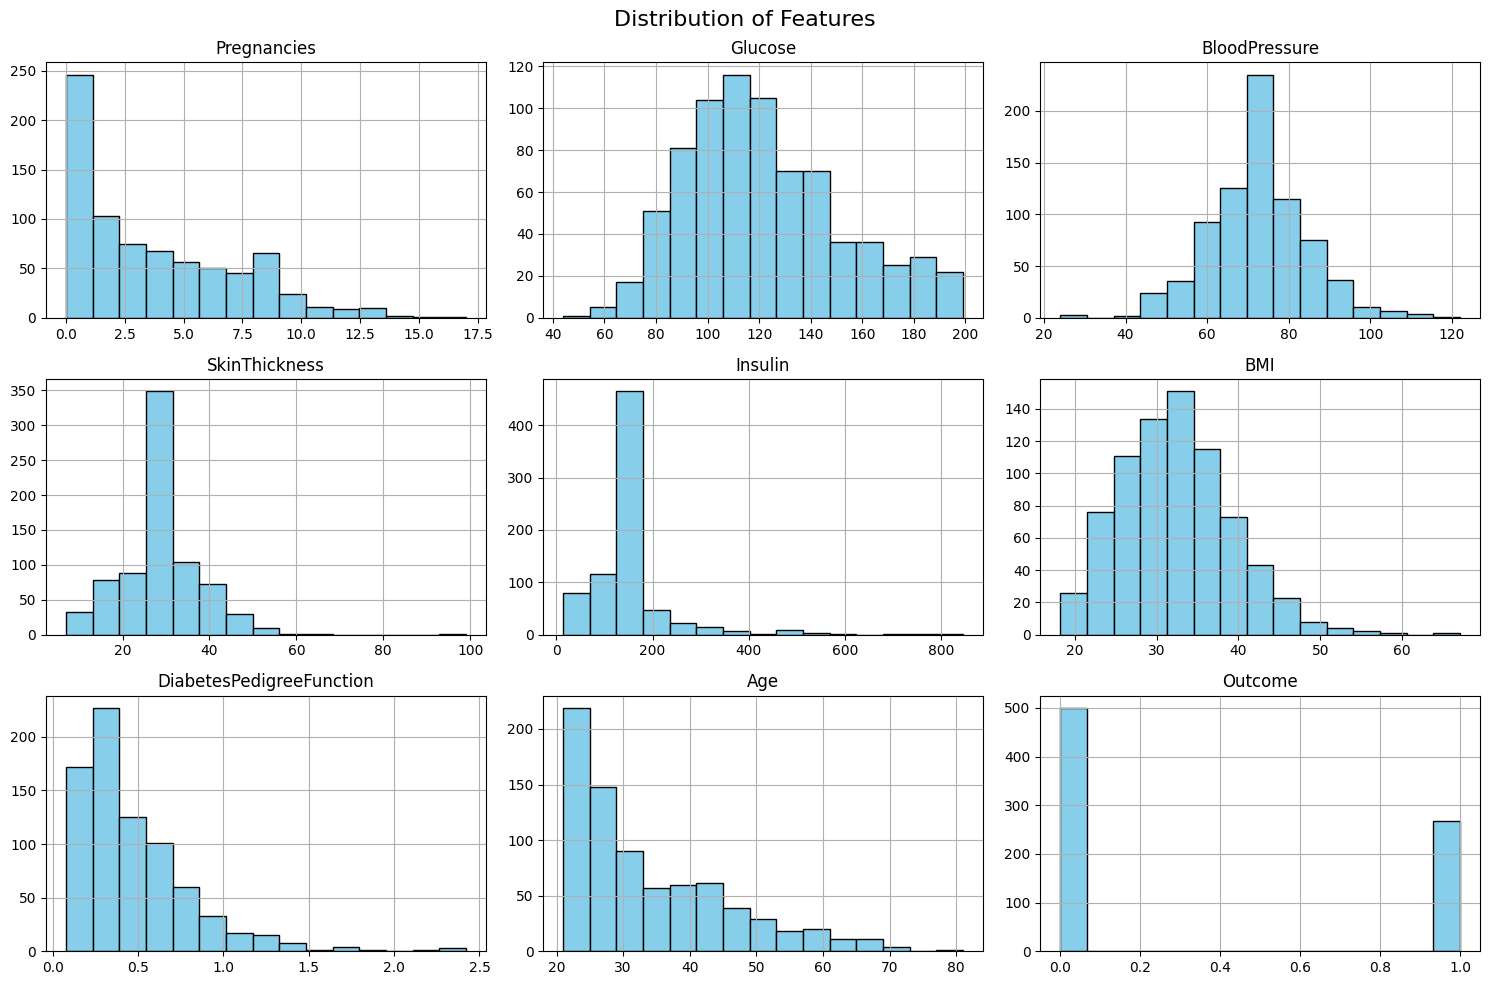

In [7]:
# 1. Histograms for feature distributions
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Features', fontsize=16)
plt.tight_layout()
plt.show()



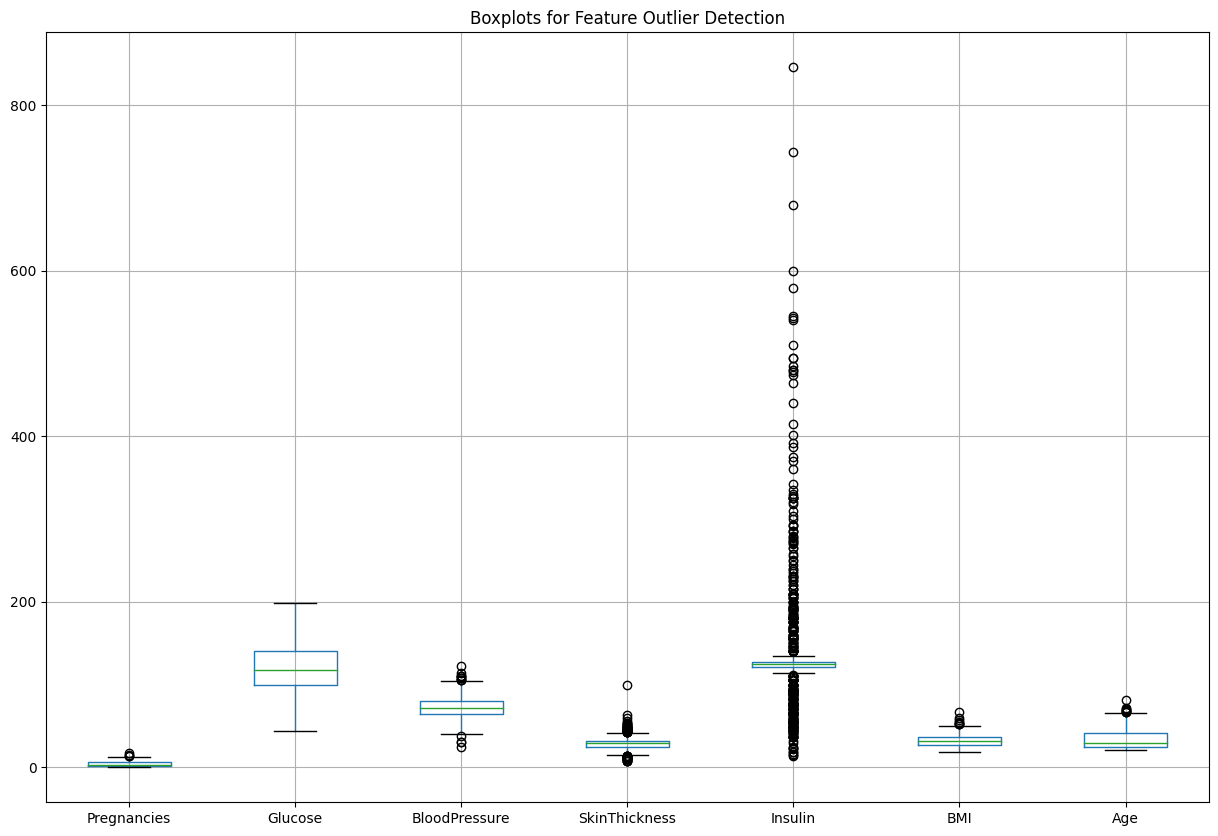

In [8]:

# 2. Boxplots for outlier detection
plt.figure(figsize=(15, 10))
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']].boxplot()
plt.title('Boxplots for Feature Outlier Detection')
plt.show()



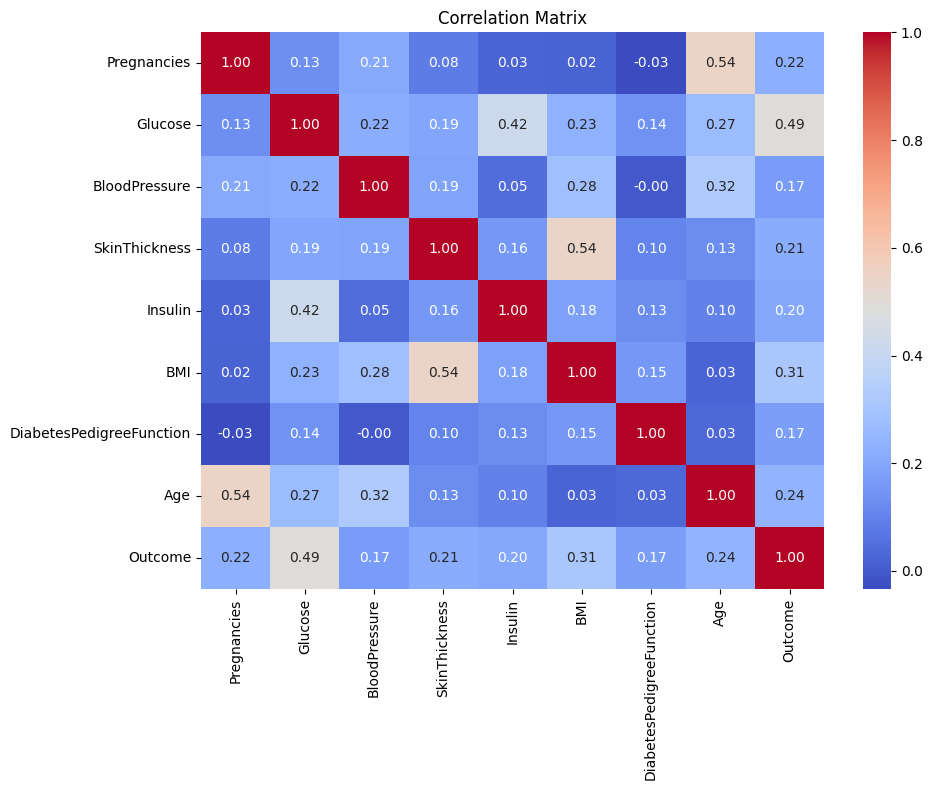

In [9]:
# 3. Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



In [10]:

# Replace 0s with NaN and fill with median
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
df.fillna(df.median(), inplace=True)

# Features and target variable
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [11]:

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[78 21]
 [18 37]]


In [12]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



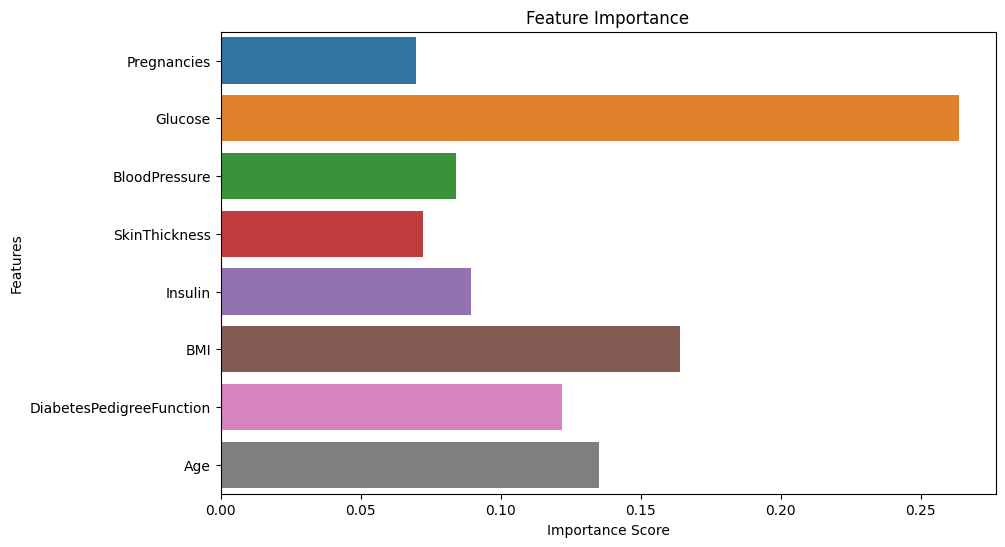

In [13]:

# Feature Importance
feature_importances = model.feature_importances_
features = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

 ## Performance Analysis


## Classification Report Summary:

Precision: The precision for class 1 (diabetic) is 0.64, meaning that of all the positive predictions, 64% were true positives.     This is relatively low, indicating that there are many false positives.                                                       
Recall: The recall for class 1 is 0.67, which shows that the model correctly identifies 67% of the actual positive cases. This suggests that while the model captures some positives, there's still room for improvement.                                          F1-Score: The F1-score for class 1 is 0.65, which is a harmonic mean of precision and recall, indicating a balanced score but still below the ideal of 1.                                                                                                 

                                                                          
## Confusion Matrix:
                                                                                                                               
The confusion matrix indicates that:
True Negatives (TN): 78 (correctly predicted non-diabetics)                                                                         
False Positives (FP): 21 (incorrectly predicted diabetics)                                                                         
False Negatives (FN): 18 (missed diabetic cases)                                                                         
True Positives (TP): 37 (correctly predicted diabetics)                                          
Steps to Improve the Model                                    
                                    

In [14]:
# Step 2: Prepare the features and target variable
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']                # Target variable

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7467532467532467


In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [16]:
import pandas as pd

# Define new test cases with names
new_data = pd.DataFrame({
    "Name": ["Naved shaikh", "Samir shaikh", "Kiran patil", "Vishal", "Umar Shaikh"],
    "Pregnancies": [3, 2, 5, 1, 4],
    "Glucose": [130, 70, 160, 90, 120],
    "BloodPressure": [70, 60, 80, 75, 65],
    "SkinThickness": [30, 25, 35, 20, 28],
    "Insulin": [110, 0, 150, 80, 100],
    "BMI": [31.0, 22.0, 34.5, 24.0, 29.5],
    "DiabetesPedigreeFunction": [0.5, 0.2, 0.6, 0.4, 0.3],
    "Age": [40, 25, 35, 30, 50]
})

# Prepare the features for prediction
X_new = new_data.drop('Name', axis=1)  # Drop the Name column for prediction

# Make predictions for the new data
new_predictions = model.predict(X_new)

# Add predictions to the DataFrame
new_data['Predicted Outcome'] = new_predictions

# Print the results
print("\nPredictions for new data:")
print(new_data[['Name', 'Predicted Outcome']])



Predictions for new data:
           Name  Predicted Outcome
0  Naved shaikh                  1
1  Samir shaikh                  0
2   Kiran patil                  1
3        Vishal                  0
4   Umar Shaikh                  0
